# Natural Language Processing Project

In this NLP project we will be attempt to classify Women's E-Commerce Clothing Reviews into 1 star or 5 star categories based off the text content in the reviews. We will utilize the pipeline methods with Multinomial Naive Bayes.

We will use the [Women's E-Commerce Clothing Reviews Data Set from Kaggle](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews) with 23,000 reviews and ratings.

Each observation in this dataset is a review of a particular product by a particular user.

The "ratings" column is the number of stars (1 through 5) assigned by the reviewer to the product. (Higher rating is better.) In other words, it is the rating of the product by the person who wrote the review.

## Imports

In [2]:
import numpy as np
import pandas as pd

## The Data

**Reading the Womens Clothing E-Commerce Reviews.csv file and set it as a dataframe e_commerce.**

In [3]:
e_commerce = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

**Checking the head, info , and describe methods on E_Commerce Website.**

In [23]:
e_commerce.head()

,Unnamed: 0,Clothing_ID,Age,Title,Review_Text,Rating,Recommended,Positive_Feedback_Count,Division_Name,Department Name,Class_Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


**Renaming the columns**

In [22]:
e_commerce = e_commerce.rename(columns={'Clothing ID': 'Clothing_ID',
                                        'Review Text': 'Review_Text', 'Recommended IND':'Recommended'
                                        ,'Positive Feedback Count':'Positive_Feedback_Count',
                                       'Division Name':'Division_Name','Class Name':'Class_Name'})


In [24]:
e_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing_ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review_Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended              23486 non-null  int64 
 7   Positive_Feedback_Count  23486 non-null  int64 
 8   Division_Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class_Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [25]:
e_commerce.describe()

,Unnamed: 0,Clothing_ID,Age,Rating,Recommended,Positive_Feedback_Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


**Creating a new column called "text_length" which is the number of words in the text column.**

In [27]:
e_commerce['Review_Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review_Text, Length: 23486, dtype: object

In [99]:
e_commerce['text_length'] = e_commerce['Review_Text'].str.len()

In [100]:
e_commerce['text_length']

0         53.0
1        303.0
2        500.0
3        124.0
4        192.0
         ...  
23481    131.0
23482    223.0
23483    208.0
23484    427.0
23485    110.0
Name: text_length, Length: 23486, dtype: float64

# EDA

Exploratory Data Analysis

## Imports

**Importing the data visualization libraries.**

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

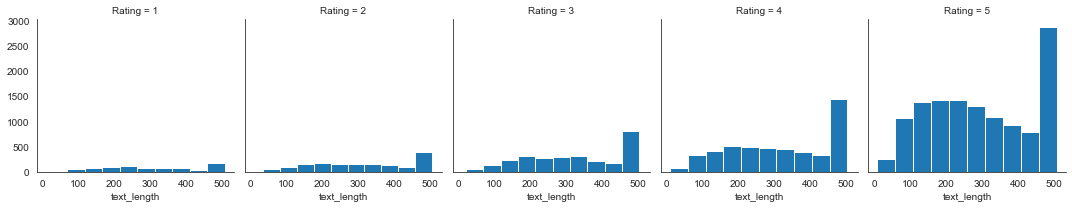

In [103]:
g = sns.FacetGrid(e_commerce,col='Rating',palette='viridis')
g.map(plt.hist,'text_length')

**Create a boxplot of text length for each star category.**

<AxesSubplot:xlabel='Rating', ylabel='text_length'>

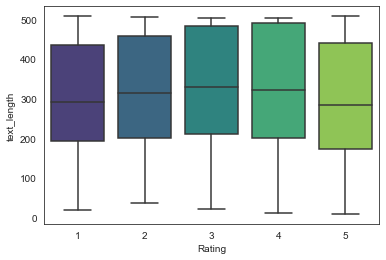

In [104]:
sns.boxplot(x='Rating',y='text_length',data=e_commerce,palette='viridis')

**Creating a countplot of the number of occurrences for each type of ratings.**

<AxesSubplot:xlabel='Rating', ylabel='count'>

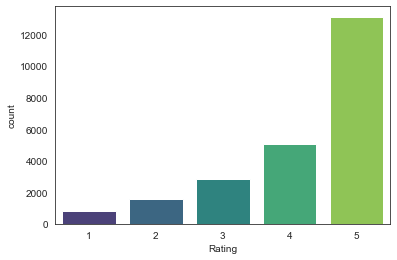

In [36]:
sns.countplot(x='Rating',data=e_commerce,palette='viridis')

**Using groupby to get the mean values of the numerical columns, we will be able to create the following dataframe with the operation:**

In [38]:
rating = e_commerce.groupby('Rating').mean()
rating

,Unnamed: 0,Clothing_ID,Age,Recommended,Positive_Feedback_Count,text length
Rating,,,,,,
1,11949.839667,916.214964,43.693587,0.019002,3.459620,304.137637
2,11751.965495,925.016613,42.622364,0.060064,3.325879,318.610071
3,11698.867294,928.110414,42.158481,0.414141,3.145246,327.425788
4,11734.964349,921.410282,42.887532,0.966910,2.405554,322.416870
5,11740.530196,913.961389,43.583124,0.998096,2.299749,298.168581


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [105]:
rating.drop(["Unnamed: 0","Clothing_ID"], axis='columns').corr()

,Age,Recommended,Positive_Feedback_Count,text length
Age,1.000000,0.115681,-0.194958,-0.929895
Recommended,0.115681,1.000000,-0.987748,-0.101124
Positive_Feedback_Count,-0.194958,-0.987748,1.000000,0.188903
text length,-0.929895,-0.101124,0.188903,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

<AxesSubplot:>

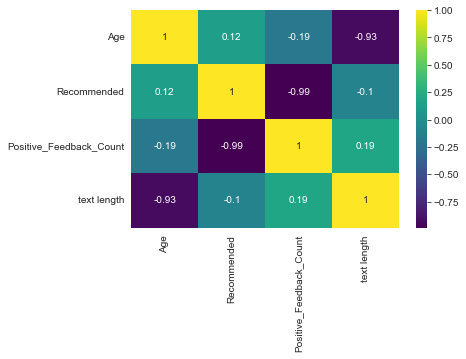

In [98]:
sns.heatmap(rating.drop(["Unnamed: 0","Clothing_ID"], axis='columns').corr(),cmap='viridis',annot=True)

## NLP Classification Task

We will work with either 1 star or 5 stars ratings.

**Create a dataframe called e_commerce_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [52]:
e_commerce_class = e_commerce[(e_commerce.Rating==1) | (e_commerce.Rating==5)]
e_commerce_class.head()

,Unnamed: 0,Clothing_ID,Age,Title,Review_Text,Rating,Recommended,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,text length
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303.0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124.0
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192.0
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,496.0
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,166.0


**Creating two objects X and y. X will be the 'Review_Text' column of e_commerce_class and y will be the 'rating' column of e_commerce_class.**

In [94]:
X = e_commerce_class['Review_Text']
y = e_commerce_class['Rating']

**Import CountVectorizer and create a CountVectorizer object.**

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

**Using the fit_transform method on the CountVectorizer object and passing it in X (the 'text' column).**

In [96]:
X = cv.fit_transform(X.values.astype('U'))

## Train Test Split


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Training a Model


**Importing MultinomialNB and creating an instance of the estimator and calling it nb**

In [62]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fitting nb using the training data.**

In [63]:
nb.fit(X_train,y_train)

MultinomialNB()

## Predictions and Evaluations

**Using the predict method off of nb to predict labels from X_test.**

In [64]:
predictions = nb.predict(X_test)

**Creating a confusion matrix and classification report using the predictions and y_test.**

In [65]:
from sklearn.metrics import confusion_matrix,classification_report

In [66]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 107  139]
 [  13 3933]]


              precision    recall  f1-score   support

           1       0.89      0.43      0.58       246
           5       0.97      1.00      0.98      3946

    accuracy                           0.96      4192
   macro avg       0.93      0.72      0.78      4192
weighted avg       0.96      0.96      0.96      4192

